# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [4]:
# your answer here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [7]:
employee = pd.read_csv('/Users/ricardomendes/Desktop/LABS/Week4/lab-pivot-table-and-correlation/your_code/data/Employee.csv')
employee.head(20)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [21]:
# Method 1
# your answer here

grouped = employee.groupby(['Department'])['Salary'].mean()
grouped.head()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [20]:
# Method 2
# your answer here

pivot_table = pd.pivot_table(employee, values='Salary', index=['Department'], aggfunc='mean')
pivot_table.head()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [19]:
# your answer here

pivot_table = pd.pivot_table(employee, values='Salary', index=['Department'], columns=['Title'], aggfunc='mean')
pivot_table.head()

Title,VP,analyst,associate
Department,,,
HR,70.0,32.5,NaN
IT,70.0,32.5,60.0
Sales,NaN,NaN,55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [18]:
# your answer here

pivot_table = pd.pivot_table(employee, values=['Years', 'Salary'], index=['Title'], aggfunc='mean')
pivot_table.head()

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [24]:
# your answer here
pivot_table = pd.pivot_table(employee, values=['Salary', 'Name'], index=['Department', 'Title'], aggfunc={'Salary': 'mean', 'Name': 'count'})
pivot_table.head()

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [33]:
# your answer here
pivot_table = pd.pivot_table(employee, values='Salary', index=['Department', 'Title'], aggfunc=[np.median, np.min, np.max, np.std])
pivot_table.head()


median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN

#### Based on your comments, fill the missing values with an appropriate value.

In [ ]:
# your answer here


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [36]:
# your answer here

pivot_table = pd.pivot_table(employee, values=['Name', 'Salary'], index=['Department'], aggfunc={'Name': 'count', 'Salary': 'sum'})

pivot_table.columns = ['Number of Employees', 'Total Salary Spend']
pivot_table.head()

,Number of Employees,Total Salary Spend
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [39]:
# your answer here
pivot_table = pd.pivot_table(employee, values=['Years', 'Salary'], index=['Department', 'Title'], aggfunc={'Years': 'sum', 'Salary': 'mean'})
pivot_table.head()

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [23]:
# your answer here

fitbit = pd.read_csv('/Users/ricardomendes/Desktop/LABS/Week4/lab-pivot-table-and-correlation/your_code/data/Fitbit.csv')
fitbit.head(20)


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
5,13-05-2015,276,779,5.79,15,726.000,172,34,18,1094,405,47,31,457
6,14-05-2015,2687,5614,4.17,2,782.000,216,13,1,9830,381,28,12,415
7,15-05-2015,2793,8169,6.07,14,801.000,218,8,7,1092,269,34,16,306
8,16-05-2015,4061,19971,14.84,18,532.000,247,101,118,27,452,26,18,507
9,17-05-2015,3349,852,6.33,12,606.000,186,46,73,1766,269,17,11,291


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [42]:
# your answer here
print(fitbit.dtypes)

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object


In [47]:
# your answer here
print(fitbit.describe())

       Calorie burned         Steps    Distance      Floors  \
count      367.000000    367.000000  367.000000  367.000000   
mean      2741.501362  10121.588556    8.549128   11.724796   
std        916.307036   5594.836225    3.409881   10.337370   
min        179.000000      0.000000    0.000000    0.000000   
25%       2698.000000   6730.500000    6.155000    5.000000   
50%       2974.000000  10413.000000    8.290000   11.000000   
75%       3233.000000  13916.500000   10.560000   16.000000   
max       4351.000000  26444.000000   20.450000  101.000000   

       Minutes Sedentary  Minutes Lightly Active  Minutes Fairly Active  \
count         367.000000              367.000000             367.000000   
mean          563.934482              236.405995              26.163488   
std           294.793145               86.531376              20.319456   
min             1.002000                0.000000               0.000000   
25%           520.000000              179.000000         

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [57]:
# your answer here
corr = fitbit['Minutes Very Active'].corr(fitbit['Steps'])
print(corr)

0.5714518481062608


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [50]:
# your answer here
import matplotlib.pyplot as plt

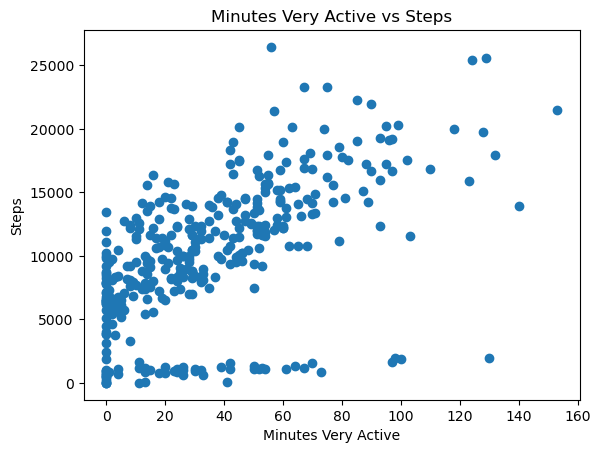

In [51]:
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.title('Minutes Very Active vs Steps')
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [56]:
# your answer here
corr = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

print(corr)

0.07690608062990091


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

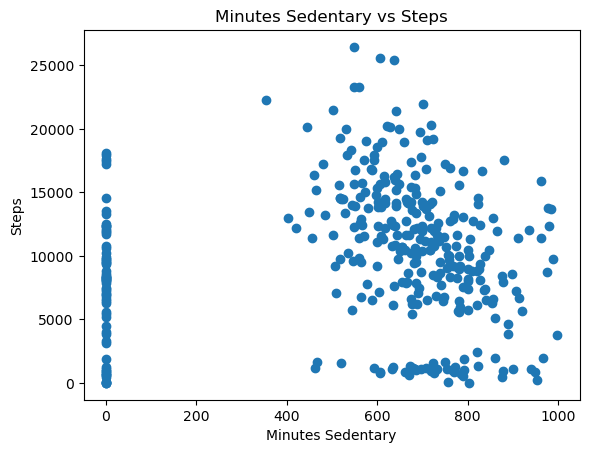

In [54]:
# your answer here

plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.title('Minutes Sedentary vs Steps')
plt.show()

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [55]:
# your answer here

corr = fitbit['MinutesOfSleep'].corr(fitbit['Steps'])
print(corr)

0.1309856595083638


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

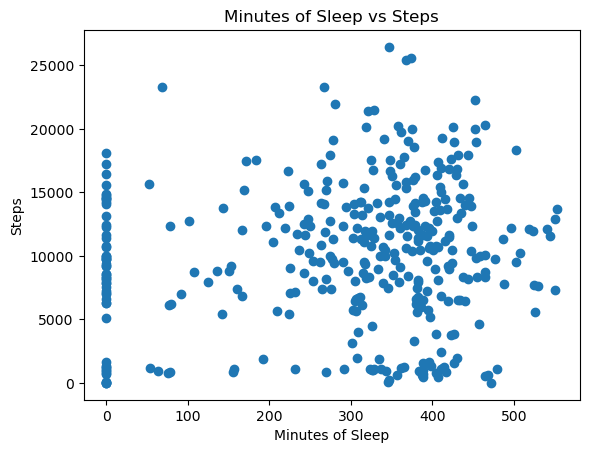

In [58]:
# your answer here

plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.xlabel('Minutes of Sleep')
plt.ylabel('Steps')
plt.title('Minutes of Sleep vs Steps')
plt.show()

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [24]:
# your answer here

columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']
subset = fitbit[columns]

cor_fit = subset.corr()
print(cor_fit)

                     Calorie burned     Steps    Floors  Minutes Sedentary  \
Calorie burned             1.000000  0.255305  0.130757           0.125353   
Steps                      0.255305  1.000000  0.306511           0.076906   
Floors                     0.130757  0.306511  1.000000           0.057812   
Minutes Sedentary          0.125353  0.076906  0.057812           1.000000   
Minutes Very Active        0.197881  0.571452  0.399503           0.105963   
MinutesOfSleep             0.011485  0.130986  0.069464           0.204242   

                     Minutes Very Active  MinutesOfSleep  
Calorie burned                  0.197881        0.011485  
Steps                           0.571452        0.130986  
Floors                          0.399503        0.069464  
Minutes Sedentary               0.105963        0.204242  
Minutes Very Active             1.000000        0.108018  
MinutesOfSleep                  0.108018        1.000000  


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [25]:
# your answer here

cor_steps = cor_fit['Steps']
cor_steps_sorted = cor_steps.sort_values(ascending=False)

print(cor_steps_sorted)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [6]:
# your answer here
time_grades = pd.read_csv('/Users/ricardomendes/Desktop/LABS/Week4/lab-pivot-table-and-correlation/your_code/data/Time_Grades.csv')
time_grades.head(20)

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

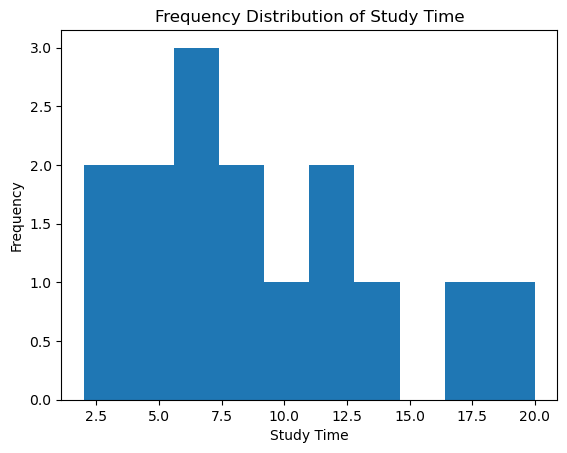

In [15]:
# your answer here

plt.hist(time_grades["Study time"], bins=10)
plt.xlabel("Study Time")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Study Time")
plt.show()


#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [18]:
# your answer here
import scipy.stats as stats

In [20]:

study_time = time_grades["Study time"]
grades = time_grades["Grade"]

pearson_corr, _ = stats.pearsonr(study_time, grades)
print("Pearson:", pearson_corr)

spearman_corr, _ = stats.spearmanr(study_time, grades)
print("Spearman:", spearman_corr)

Pearson: 0.7980456073578858
Spearman: 0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

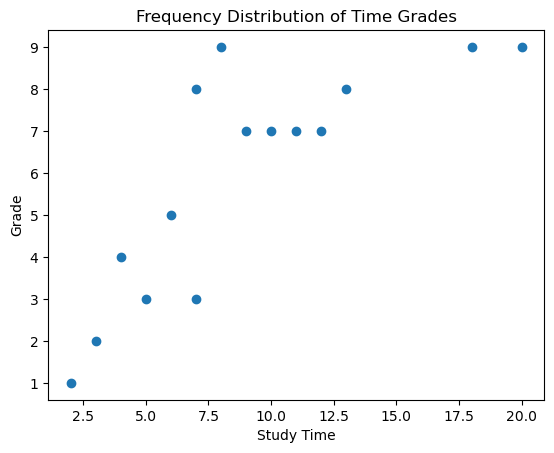

In [17]:
# your answer here
plt.scatter(x=time_grades["Study time"], y=time_grades["Grade"])
plt.xlabel("Study Time")
plt.ylabel("Grade")
plt.title("Frequency Distribution of Time Grades")
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here

##Pearson correlation measures the strength of a linear relationship, while Spearman correlation measures 
##the strength of a monotonic relationship. Unlike Pearson correlation, Spearman correlation does not assume 
##that the variables are normally distributed or that there is a linear relationship between them. Instead, 
##it assesses the degree to which the variables tend to increase or decrease together, without making assumptions
##about the specific shape of the relationship.